In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

import re

In [103]:
df = pd.read_csv('~/Downloads/Salary Data.csv')

In [104]:
df.Gender.value_counts()

Gender
Male      194
Female    179
Name: count, dtype: int64

In [105]:
df.dropna(how='any', inplace=True)

In [106]:
def cleanExtraSpaces(title_val): # get's rid of extra/double whitespace, improves accuracy
    return re.sub(r'\s+', ' ', title_val).strip()


def estimateJobRanking(job_title): # give's the model a better "idea" of what a job title means by converting it to a number/ranking
	base_score = 100 # all titles start here
	delta = 30 # penalty/upgrade amount
	penalty = ["intern", "junior", "jr", "jr.",  "analyst", "clerk", "associate", "assistant", "specialist", "representative", "coordinator", "support"]
	upgrade = ["director", "manager", "senior", "sr", "sr.", "ceo", "chief", "cto", "vice", "vp", "svp", "avp", "principal", "lead"]
	weights = dict.fromkeys(penalty, -delta)
	weights.update(dict.fromkeys(upgrade, delta)) # sum penalty and upgrade weights:
	return base_score + sum(map(lambda x: weights.get(x, 0), job_title.lower().split(' ')))


df = df[df['Salary'] >= 5000] # drops all salaries less than 5k because that is unreasonable (there was one that was $350)

df['Age'] = df['Age'].astype(int)
df['Years of Experience'] = df['Years of Experience'].astype(int)
df['Salary'] = df['Salary'].astype(int)


df['Job Title'] = df['Job Title'].astype(str)
df['Job Title'] = df['Job Title'].map(cleanExtraSpaces)
df['Job Ranking'] = df['Job Title'].map(estimateJobRanking)
df.drop(['Job Title'], axis=1, inplace=True)



label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])


In [179]:
df['Job Ranking'].value_counts()
df

,Age,Gender,Education Level,Years of Experience,Salary,Job Ranking
0,32,1,0,5,90000,100
1,28,0,1,3,65000,70
2,45,1,2,15,150000,160
3,36,0,0,7,60000,70
4,52,1,1,20,200000,130
...,...,...,...,...,...,...
370,35,0,0,8,85000,100
371,43,1,1,19,170000,130
372,29,0,0,2,40000,100
373,34,1,0,7,90000,100


In [108]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [150]:
y_pred = model.predict(X_test)

In [153]:
#Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Absolute Error: 8250.79365079365
Mean Squared Error: 212513605.44217688


In [169]:
model.score(X_test,y_test)

0.8597371332025928

In [170]:
predictions = pd.Series(y_pred)
actual = pd.Series(y_test)

In [171]:
for i in range(len(y_test)):
    print('Real salary was:', actual.iloc[i], '\t', 'Predicted salary was:', predictions.iloc[i])

Real salary was: 50000 	 Predicted salary was: 50000.0
Real salary was: 65000 	 Predicted salary was: 55000.0
Real salary was: 125000 	 Predicted salary was: 130000.0
Real salary was: 95000 	 Predicted salary was: 86666.66666666667
Real salary was: 140000 	 Predicted salary was: 150000.0
Real salary was: 160000 	 Predicted salary was: 160000.0
Real salary was: 160000 	 Predicted salary was: 130000.0
Real salary was: 120000 	 Predicted salary was: 100000.0
Real salary was: 120000 	 Predicted salary was: 140000.0
Real salary was: 95000 	 Predicted salary was: 95000.0
Real salary was: 140000 	 Predicted salary was: 145000.0
Real salary was: 160000 	 Predicted salary was: 135000.0
Real salary was: 35000 	 Predicted salary was: 40000.0
Real salary was: 95000 	 Predicted salary was: 95000.0
Real salary was: 110000 	 Predicted salary was: 130000.0
Real salary was: 95000 	 Predicted salary was: 95000.0
Real salary was: 90000 	 Predicted salary was: 60000.0
Real salary was: 50000 	 Predicted sa

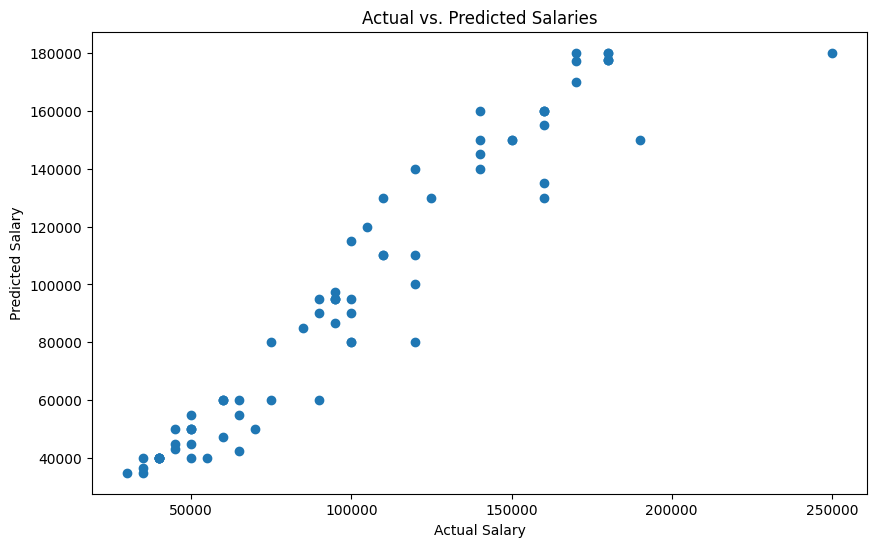

In [172]:
# Predicted vs. actual salaries plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salaries")
plt.show()

[Text(0.5, 0.875, 'Age <= 40.5\nsquared_error = 2237899193.96\nsamples = 297\nvalue = 100858.586'),
 Text(0.25, 0.625, 'Years of Experience <= 5.5\nsquared_error = 753655131.681\nsamples = 193\nvalue = 72564.767'),
 Text(0.125, 0.375, 'Years of Experience <= 2.5\nsquared_error = 134744210.775\nsamples = 92\nvalue = 49076.087'),
 Text(0.0625, 0.125, 'squared_error = 9204470.743\nsamples = 39\nvalue = 39358.974'),
 Text(0.1875, 0.125, 'squared_error = 106514773.941\nsamples = 53\nvalue = 56226.415'),
 Text(0.375, 0.375, 'Job Ranking <= 85.0\nsquared_error = 357087540.437\nsamples = 101\nvalue = 93960.396'),
 Text(0.3125, 0.125, 'squared_error = 101000000.0\nsamples = 10\nvalue = 62000.0'),
 Text(0.4375, 0.125, 'squared_error = 260644849.656\nsamples = 91\nvalue = 97472.527'),
 Text(0.75, 0.625, 'Age <= 46.5\nsquared_error = 749731878.698\nsamples = 104\nvalue = 153365.385'),
 Text(0.625, 0.375, 'Education Level <= 1.5\nsquared_error = 551751479.29\nsamples = 65\nvalue = 141307.692'),
 Te

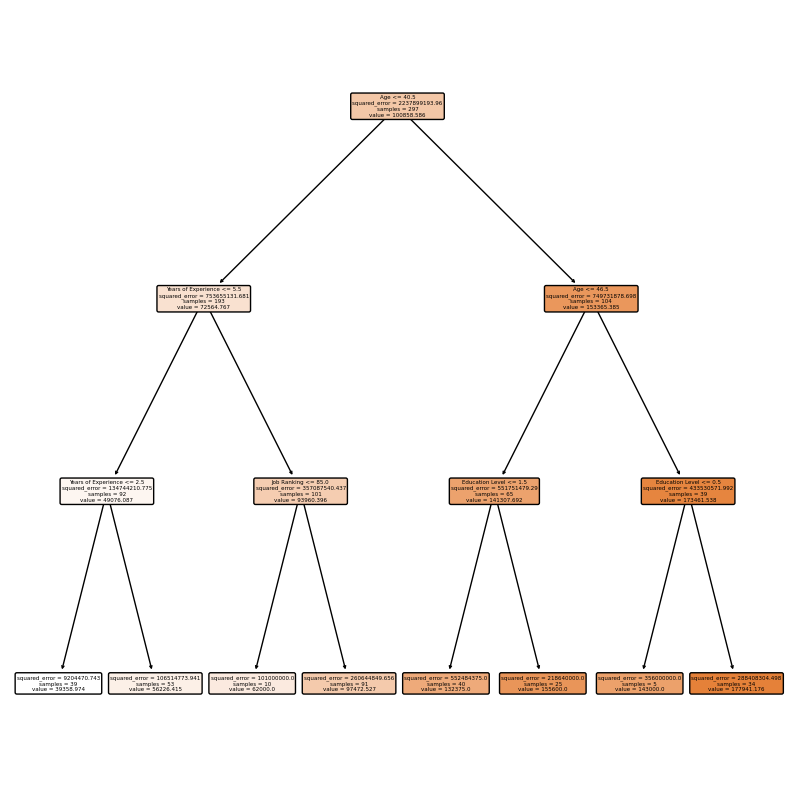

In [173]:
feature_names = X.columns.tolist()

# Decision tree plot
plt.figure(figsize=(10,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plot_tree(model, feature_names=feature_names, filled=True, rounded=True, max_depth=2)
plot_tree(model, feature_names=feature_names, filled=True, rounded=True, fontsize=4)

               Feature  Importance
0                  Age    0.784215
3  Years of Experience    0.173824
2      Education Level    0.022900
4          Job Ranking    0.019061
1               Gender    0.000000


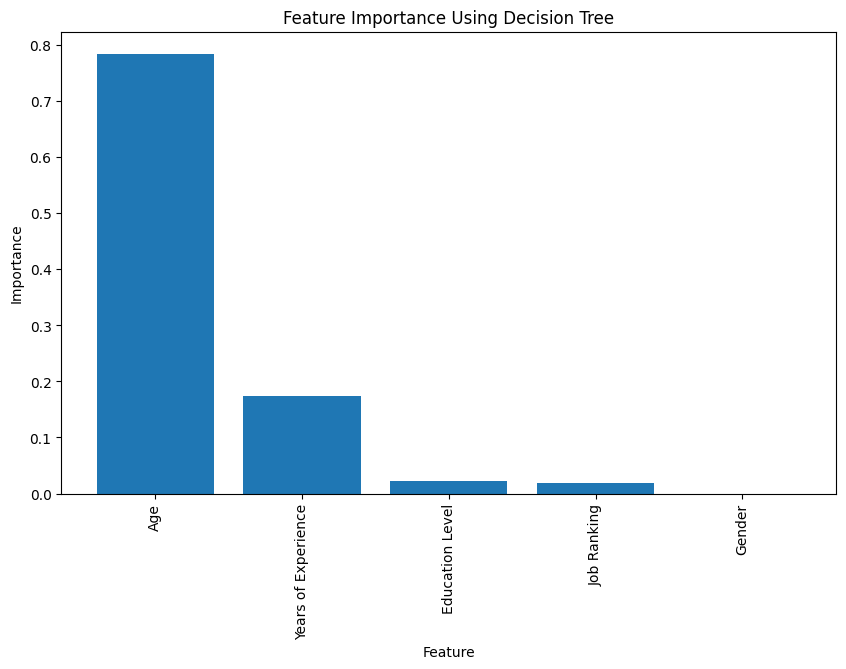

In [174]:
# Get feature importances
feature_importances = model.feature_importances_

# DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

features = X.columns

# Feature importance values and corresponding feature names sorted
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importance = feature_importances[sorted_indices]
sorted_features = features[sorted_indices]


# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), sorted_feature_importance, align='center')
plt.xticks(range(len(features)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Using Decision Tree')
plt.show()



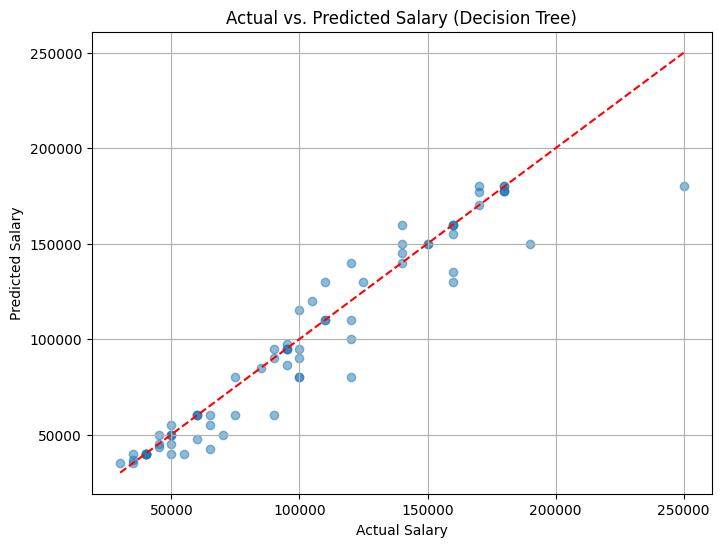

In [175]:
# Actual vs. predicted values plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Actual vs. Predicted Salary (Decision Tree)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.show()

In [176]:
#Inputting my own values 
output = model.predict([[36, 0, 0, 7, estimateJobRanking('Sales Associate')]])
try:
    print("Salary prediction is", int(output[0]))
except:
    print("Error: prediction was not possible.")

Salary prediction is 62000


/Users/natalia/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


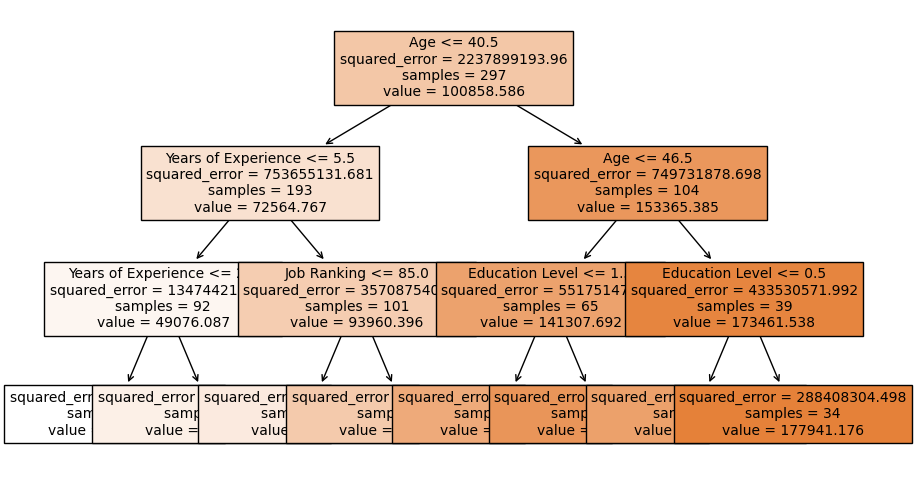

In [177]:
# DecisionTreeRegressor with max_depth parameter
model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Fit the model using training data
model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plot_tree(model, feature_names=X.columns, filled=True, fontsize=10)
plt.show()